In [90]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pathlib

# loading dataset

In [91]:
def load_dataset(path):
    data = []
    dataset_path = pathlib.Path(path)
    for pp in dataset_path.iterdir():
        for p in pp.iterdir():
            data.append((p, pp.name))
    return data

In [92]:
train_dataset = load_dataset("./day_night/training")

In [93]:
def data_preparation(data):
    data_types = ['day', 'night']
    for i in range(len(data)):
        img = cv2.imread(str(data[i][0]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        data[i] = img, 1 if data[i][1] == 'day' else 0
    return data

In [94]:
train_data = data_preparation(train_dataset)

In [95]:
def show_images(data, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for r in range(rows):
        for c in range(cols):
            img = cv2.cvtColor(data[r * cols + c][0], cv2.COLOR_HSV2RGB)
            axes[r, c].imshow(img)
            axes[r, c].set_title(f"{r * cols + c + 1}")
    plt.show()

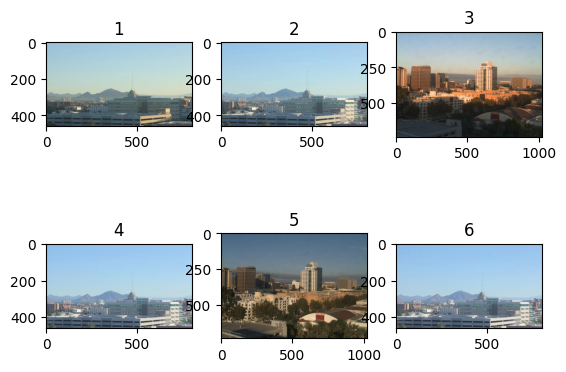

In [96]:
show_images(train_data, 2, 3)

In [97]:
shapes = np.array([img.shape for img, dtype in train_data])

In [98]:
shapes

array([[ 458,  800,    3],
       [ 458,  800,    3],
       [ 737, 1024,    3],
       [ 458,  800,    3],
       [ 737, 1024,    3],
       [ 458,  800,    3],
       [ 737, 1024,    3],
       [ 737, 1024,    3],
       [ 458,  800,    3],
       [ 737, 1024,    3],
       [ 458,  800,    3],
       [ 737, 1024,    3],
       [ 458,  800,    3],
       [ 737, 1024,    3],
       [ 458,  800,    3],
       [ 737, 1024,    3],
       [ 458,  800,    3],
       [ 458,  800,    3],
       [ 737, 1024,    3],
       [ 458,  800,    3],
       [ 737, 1024,    3],
       [ 458,  800,    3],
       [ 737, 1024,    3],
       [ 458,  800,    3],
       [ 737, 1024,    3],
       [ 458,  800,    3],
       [ 737, 1024,    3],
       [ 458,  800,    3],
       [ 737, 1024,    3],
       [ 737, 1024,    3],
       [ 372,  640,    3],
       [ 469,  640,    3],
       [ 591,  800,    3],
       [ 469,  640,    3],
       [ 593,  800,    3],
       [ 372,  640,    3],
       [ 469,  640,    3],
 

In [99]:
shapes = shapes[:, :2]

In [100]:
shapes

array([[ 458,  800],
       [ 458,  800],
       [ 737, 1024],
       [ 458,  800],
       [ 737, 1024],
       [ 458,  800],
       [ 737, 1024],
       [ 737, 1024],
       [ 458,  800],
       [ 737, 1024],
       [ 458,  800],
       [ 737, 1024],
       [ 458,  800],
       [ 737, 1024],
       [ 458,  800],
       [ 737, 1024],
       [ 458,  800],
       [ 458,  800],
       [ 737, 1024],
       [ 458,  800],
       [ 737, 1024],
       [ 458,  800],
       [ 737, 1024],
       [ 458,  800],
       [ 737, 1024],
       [ 458,  800],
       [ 737, 1024],
       [ 458,  800],
       [ 737, 1024],
       [ 737, 1024],
       [ 372,  640],
       [ 469,  640],
       [ 591,  800],
       [ 469,  640],
       [ 593,  800],
       [ 372,  640],
       [ 469,  640],
       [ 469,  640],
       [ 593,  800],
       [ 700, 1280],
       [ 372,  640],
       [ 700, 1280],
       [ 469,  640],
       [ 700, 1280],
       [ 700, 1280],
       [ 700, 1280],
       [ 469,  640],
       [ 700,

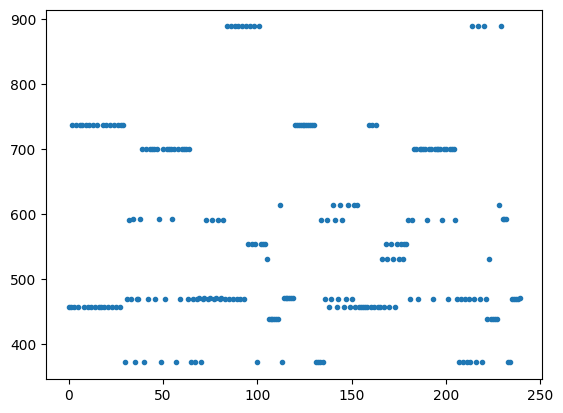

In [101]:
plt.plot(shapes[:, 0], ".")
plt.show()

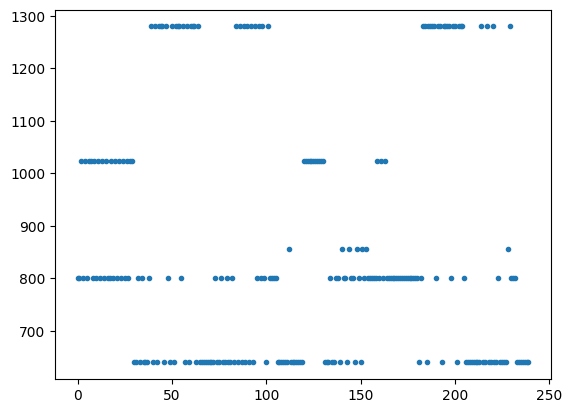

In [102]:
plt.plot(shapes[:, 1], ".")
plt.show()

In [109]:
mean_shape = np.mean(shapes, axis=0).astype(int)

In [110]:
mean_shape

array([565, 863])

In [122]:
def change_shapes_data(data, shape):
    for i in range(len(data)):
        data[i] = cv2.resize(data[i][0], dsize=(shape[1], shape[0])), data[i][1]
    return data

In [123]:
train_data = change_shapes_data(train_data, mean_shape)

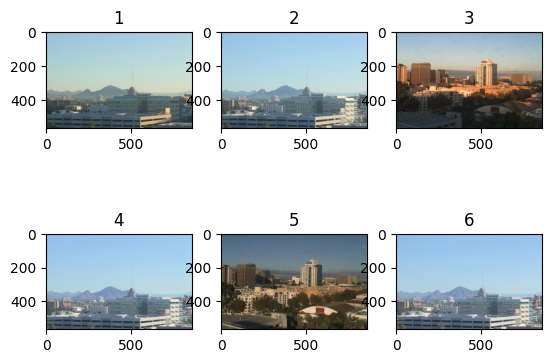

In [124]:
show_images(train_data, 2, 3)

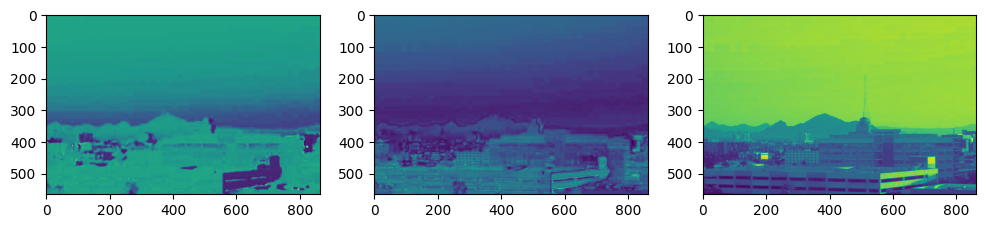

In [130]:
H, S, V = np.dsplit(train_data[0][0], 3)
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(H)

plt.subplot(132)
plt.imshow(S)

plt.subplot(133)
plt.imshow(V)

plt.show()

[(array([[[102,  70, 218],
          [102,  70, 218],
          [102,  70, 218],
          ...,
          [101,  58, 228],
          [101,  58, 229],
          [101,  58, 229]],
  
         [[102,  70, 218],
          [102,  70, 218],
          [102,  70, 218],
          ...,
          [101,  57, 230],
          [101,  57, 230],
          [101,  57, 231]],
  
         [[102,  70, 218],
          [102,  70, 218],
          [102,  70, 218],
          ...,
          [101,  57, 230],
          [101,  57, 230],
          [101,  57, 230]],
  
         ...,
  
         [[101,  46,  43],
          [101,  44,  45],
          [101,  43,  46],
          ...,
          [ 96,  33,  76],
          [ 96,  34,  76],
          [ 96,  34,  75]],
  
         [[101,  45,  44],
          [101,  44,  45],
          [101,  43,  47],
          ...,
          [ 96,  33,  77],
          [ 96,  34,  77],
          [ 96,  34,  76]],
  
         [[101,  45,  44],
          [101,  44,  45],
          [101,  43,  46